In [1]:
import mlflow
from mlflow.entities import ViewType
import seaborn as sns
from IPython.display import Image, display

E:\BERT\uvl-tore-classifier-bert\venv\Lib\site-packages\pydantic\_internal\_fields.py:128: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
E:\BERT\uvl-tore-classifier-bert\venv\Lib\site-packages\pydantic\_internal\_config.py:317: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


ModuleNotFoundError: No module named 'seaborn'

In [2]:
mlflow.get_registry_uri()

'https://bockstaller.cc'

In [3]:
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)

/Users/bockstaller/code/uvl-tore-classifier-bert/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Outlier


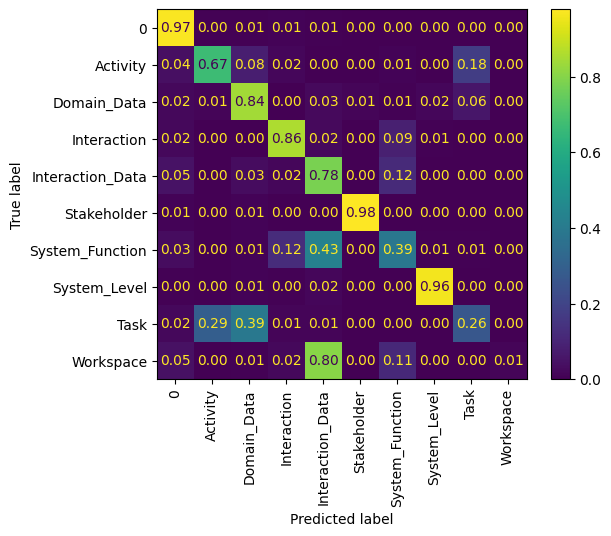

Selected


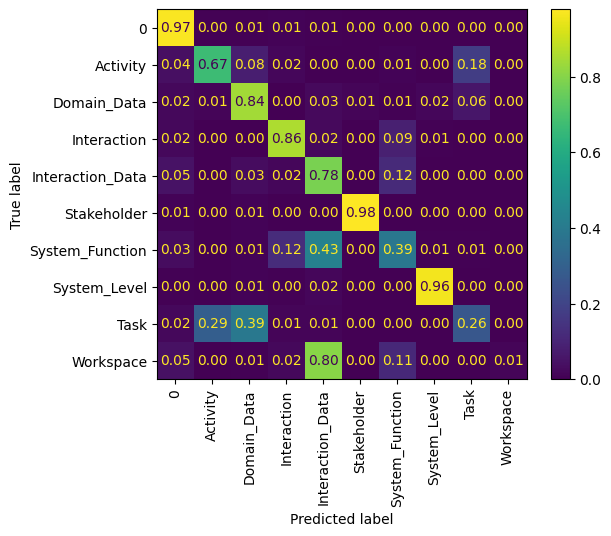

8625a89598dd4240be3245266e0479b0
     Number of Epochs Train Batch Size LR BERT  LR Classifier  Weight Decay  \
227                 5                8   3e-05           0.16           0.1   

     Layer Count  Mean Recall  Mean Precision        F1  Selected  
227            1     0.663819        0.653889  0.658816  Selected  


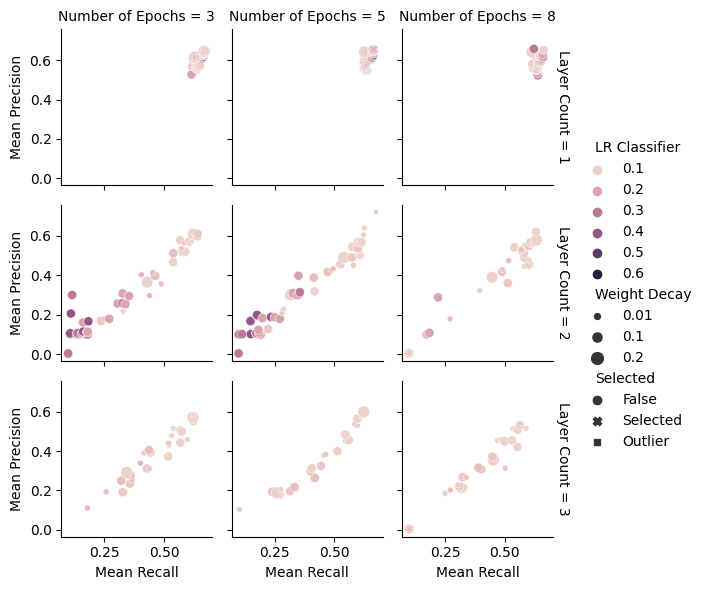

In [4]:
experiment = mlflow.get_experiment_by_name(
    "v2_2ndStageDualModelBertParameterSweep"
)
runs = mlflow.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    output_format="pandas",
)
dataset_all_runs = runs[runs["params.experiment.dataset"].isin(["all"])]
presentation_dataset = dataset_all_runs.copy()[
    [
        "params.bert.number_epochs",
        "params.bert.train_batch_size",
        "params.bert.learning_rate_bert",
        "params.bert.learning_rate_classifier",
        "params.bert.weight_decay",
        "params.bert.num_layers",
        "metrics.mean_recall",
        "metrics.mean_precision",
    ]
]
presentation_dataset.rename(
    columns={
        "params.bert.number_epochs": "Number of Epochs",
        "params.bert.train_batch_size": "Train Batch Size",
        "params.bert.learning_rate_bert": "LR BERT",
        "params.bert.learning_rate_classifier": "LR Classifier",
        "params.bert.num_layers": "Layer Count",
        "params.bert.weight_decay": "Weight Decay",
        "metrics.mean_recall": "Mean Recall",
        "metrics.mean_precision": "Mean Precision",
    },
    inplace=True,
)

presentation_dataset["Layer Count"] = presentation_dataset[
    "Layer Count"
].astype("int32")
presentation_dataset["Layer Count"] = presentation_dataset["Layer Count"] + 1


presentation_dataset["Number of Epochs"] = presentation_dataset[
    "Number of Epochs"
].astype("int32")
presentation_dataset["Weight Decay"] = presentation_dataset[
    "Weight Decay"
].astype("float32")
presentation_dataset["LR Classifier"] = presentation_dataset[
    "LR Classifier"
].astype("float32")


presentation_dataset["F1"] = (
    2
    * presentation_dataset["Mean Precision"]
    * presentation_dataset["Mean Recall"]
) / (
    presentation_dataset["Mean Precision"]
    + presentation_dataset["Mean Recall"]
)
presentation_dataset.sort_values(by="F1", ascending=False, inplace=True)


presentation_dataset["Selected"] = "False"
presentation_dataset.iloc[
    0, presentation_dataset.columns.get_loc("Selected")
] = "Outlier"
presentation_dataset.iloc[
    1, presentation_dataset.columns.get_loc("Selected")
] = "Selected"
presentation_dataset.sort_values(by="F1", ascending=True, inplace=True)

fg = sns.relplot(
    data=presentation_dataset,
    y="Mean Precision",
    x="Mean Recall",
    col="Number of Epochs",
    row="Layer Count",
    hue="LR Classifier",
    hue_norm=(0.1, 0.6),
    size="Weight Decay",
    style="Selected",
    facet_kws={"margin_titles": True},
    height=2,
    kind="scatter",
)
selected_run = dataset_all_runs.loc[
    presentation_dataset["Selected"] == "Outlier"
]
run_id = selected_run["run_id"].values[0]
path_outlier = mlflow.artifacts.download_artifacts(
    run_id=run_id, artifact_path="confusion_matrix.png"
)
print("Outlier")
display(Image(filename=path_outlier))

selected_run = dataset_all_runs.loc[
    presentation_dataset["Selected"] == "Selected"
]
run_id = selected_run["run_id"].values[0]
path_selected = mlflow.artifacts.download_artifacts(
    run_id=run_id, artifact_path="confusion_matrix.png"
)
print("Selected")
display(Image(filename=path_outlier))

print(run_id)

best_bert = presentation_dataset.loc[
    presentation_dataset["Selected"] == "Selected"
]
outlier_bert = presentation_dataset.loc[
    presentation_dataset["Selected"] == "Outlier"
]

print(best_bert)

In [5]:
from pathlib import Path
import shutil

savepath = Path("~/Documents/MA/ma_latex/images/40_design/").expanduser()

fg.savefig(
    savepath.joinpath("2nd_stage_sweep.png"),
    bbox_inches="tight",
)


shutil.copyfile(path_outlier, savepath.joinpath("outlier.png"))
shutil.copyfile(path_selected, savepath.joinpath("selected.png"))

PosixPath('/Users/bockstaller/Documents/MA/ma_latex/images/40_design/selected.png')

In [6]:
print(outlier_bert)

     Number of Epochs Train Batch Size LR BERT  LR Classifier  Weight Decay  \
106                 5                8   3e-05           0.14          0.01   

     Layer Count  Mean Recall  Mean Precision        F1 Selected  
106            2     0.672843        0.720471  0.695843  Outlier  


In [7]:
print(best_bert)

     Number of Epochs Train Batch Size LR BERT  LR Classifier  Weight Decay  \
227                 5                8   3e-05           0.16           0.1   

     Layer Count  Mean Recall  Mean Precision        F1  Selected  
227            1     0.663819        0.653889  0.658816  Selected  


In [8]:
presentation_dataset

,Number of Epochs,Train Batch Size,LR BERT,LR Classifier,Weight Decay,Layer Count,Mean Recall,Mean Precision,F1,Selected
84,3,16,3e-05,0.40,0.10,2,0.100000,0.000939,0.001860,False
74,3,8,3e-05,0.30,0.10,2,0.100000,0.003442,0.006656,False
54,5,16,3e-05,0.40,0.10,2,0.100000,0.003478,0.006723,False
62,5,16,3e-05,0.30,0.10,2,0.100000,0.003478,0.006723,False
109,8,8,3e-05,0.12,0.10,2,0.100000,0.004685,0.008951,False
...,...,...,...,...,...,...,...,...,...,...
341,3,8,3e-05,0.10,0.01,1,0.669963,0.645945,0.657735,False
5,3,8,3e-05,0.10,0.10,1,0.670658,0.646628,0.658424,False
227,5,8,3e-05,0.16,0.10,1,0.663819,0.653889,0.658816,Selected
106,5,8,3e-05,0.14,0.01,2,0.672843,0.720471,0.695843,Outlier
